# Foundations of Data Mining: Assignment 3
Please complete all assignments in this notebook. You should submit this notebook, as well as a PDF version (See File > Download as).

In [72]:
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100 # This controls the size of your figures
# Comment out and restart notebook if you only want the last output of each cell.
InteractiveShell.ast_node_interactivity = "all" 

##  Random Projections with 1-NN (6 points, 3+3)

Implement random projections for dimensionality reduction as follows.
Randomly generate a $k \times d$ matrix $\bf R$ by choosing its coefficients
$$
r_{i,j}=
\begin{cases}
+\frac{1}{{\sqrt{d}}} \quad \text{with probability}\quad &\frac{1}{2}\\
-\frac{1}{\sqrt{d}} \quad \text{with probability} \quad & \frac{1}{2}
\end{cases}
$$ 
Let $f:\mathbb{R}^d \rightarrow \mathbb{R}^k$ denote the linear mapping function that 
multiplies a $d$-dimensional vector with this matrix $f(p)={\bf R}p$.
For the following exercises use the same data set as was used for Assignment 1 (MNIST). 
Use the following values of $k=45,90,400$ in your experiments.  
You should _not_ use sklearn.random_projection for this assignment.


###  Study the effect on pairwise distances
Evaluate how well the Euclidean distance is preserved by plotting a histogram of the 
values $\phi(p,q) = \frac{\|f(p)-f(q)\|}{\|p-q\|}$ for all pairs of the first 500 images of the MNIST data set. These values should be concentrated around a certain value for fixed $k$. What is this value expressed in terms of $k$ and $d$? Explain your answer.


In [73]:
# This is a temporary read-only OpenML key. Replace with your own key later. 
oml.config.apikey = '11e82c8d91c5abece86f424369c71590'

In [86]:
mnist_data = oml.datasets.get_dataset(554) # Download MNIST data
# Get the predictors X and the labels y
X, y = mnist_data.get_data(target=mnist_data.default_target_attribute); 

#### Concentration of $\phi$ values.

First we will derive the expected value in which the function $\phi$ is going to be concentrated.

In this exercise we have used the matrix $R$ as follows:
$$
R=r_{i,j}=
\begin{cases}
+\frac{1}{{\sqrt{d}}} \quad \text{with probability}\quad &\frac{1}{2}\\
-\frac{1}{\sqrt{d}} \quad \text{with probability} \quad & \frac{1}{2}
\end{cases}
$$ 

During class we have seen that the function $g(p)$ is defined in terms of this matrix as $g(p)=\frac{\sqrt{d}}{\sqrt{k}}Rp$. One result seen during lectures is that for any $\epsilon$ and any $p,q\in \mathbb{R}^d$

$$Pr\left[\frac{\|g(p-q)\|}{\|p-q\|}\in[1-\epsilon,1+\epsilon]     \right]\geq 1-2\text{e}^{-k/2(\epsilon^2/2-\epsilon^3/3)}$$

This means that for our projection dimension size $k$ we have that $\frac{\|g(p-q)\|}{\|p-q\|}$ is concentrated around $1$. 

Our function $f(p)=Rp$ can be identified in terms of the function $g(p)$ as $f(p)=\frac{\sqrt{k}}{\sqrt{d}}g(p)$. If we recall that $g(p)$ was concentrated around $1$ then our function will be concentrated around $\frac{\sqrt{k}}{\sqrt{d}}$ (since we are just multiplying by a constant).


From this we expect then that our values should be concentrated around $\frac{\sqrt{k}}{\sqrt{d}}$ for each value of $k$. 


We will now verify this against our histogram plots.

In [75]:
# Central value calculation
k = 45
d = 784
print("Center value for k = %d and d = %d is : %f\n"% (k,d,np.sqrt(k)/np.sqrt(d)))

k = 90
d = 784
print("Center value for k = %d and d = %d is : %f\n"% (k,d,np.sqrt(k)/np.sqrt(d)))

k = 400
d = 784
print("Center value for k = %d and d = %d is : %f\n"% (k,d,np.sqrt(k)/np.sqrt(d)))

Center value for k = 45 and d = 784 is : 0.239579

Center value for k = 90 and d = 784 is : 0.338815

Center value for k = 400 and d = 784 is : 0.714286



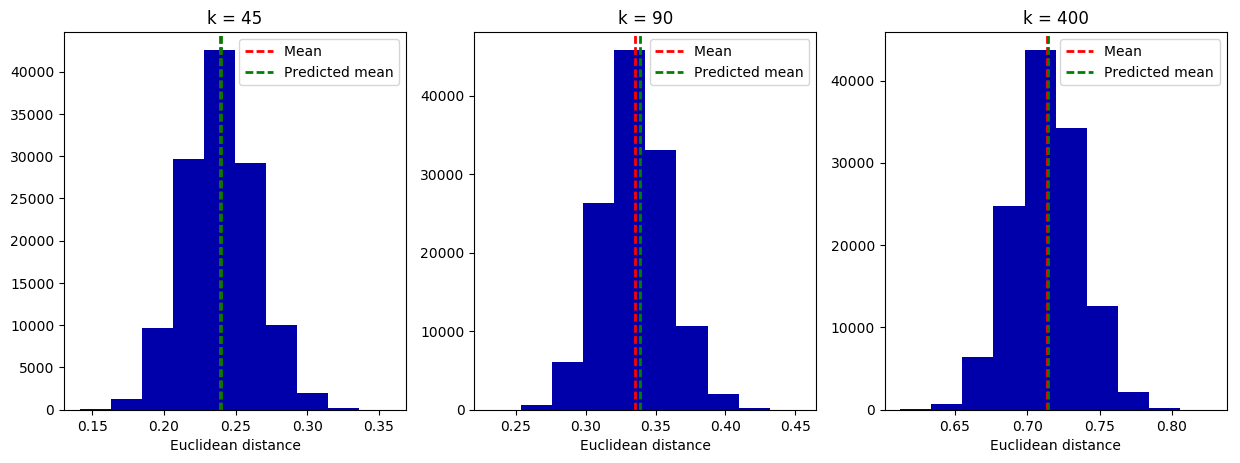

In [76]:
# create subplot
fig, axs = plt.subplots(1,3, figsize=(15,5))
axs = axs.ravel()

d=784;
end = 500;

for k, ax in zip([45, 90, 400], axs):
    # Matrix R
    R=np.random.randint(0,2,size=(k,d)) # Randomly sample with probability 1/2
    R[R==0]=-1 #Matrix values in {-1,1} 
    R = R*(1/np.sqrt(d)) #Replacement with +/- 1/sqrt(d)
    
    phi=[];
    for i in range(end):
        for j in np.arange(i+1, end, step=1):
            #Transform data points pairwise. Calculate distance
            transf = np.linalg.norm(R.dot(X[i])-R.dot(X[j]),2)
            #Distance of data points pairwise. 
            original = np.linalg.norm(X[i]-X[j],2)
            #Calculate phi
            phi.append((transf/original))
    #Plot histogram        
    ax.hist(phi);
    ax.set_title('k = %d' %k)
    ax.set_xlabel('Euclidean distance')
    ax.axis('tight')  
    ax.axvline(np.array(phi).mean(), label="Mean ",color='r', linestyle='dashed', linewidth=2)
    ax.axvline(np.sqrt(k/d), color='g', label="Predicted mean",linestyle='dashed', linewidth=2)
    ax.legend()
plt.show();

As we can see, the central values of our histograms is close to the prediction we had from our analysis. Also, we can see that for bigger values of $k$ our predicted mean is closer to the real mean. Since the values of $\phi$ are concentrated around $\frac{\sqrt{k}}{\sqrt{d}}$ $$Pr\left[\phi \in\left[\frac{\sqrt{k}}{\sqrt{d}}-\epsilon,\frac{\sqrt{k}}{\sqrt{d}}+\epsilon\right]\right]\geq 1-2\text{e}^{-k/2(\epsilon^2/2-\epsilon^3/3)}$$

So, the probability that the mean is more concentrated around $\frac{\sqrt{k}}{\sqrt{d}}$ for a fixed $\epsilon$ increases with the value of $k$.


We conclude that the values of $\phi(p,q)$ are centered around $\frac{\sqrt{k}}{\sqrt{d}}$ with a high probability.

### Study the effect on classification
Compare the performance of a $1$-NN classifier with and without random projection. Report multi-class confusion matrix, precision and recall for each class with and without projection and for each value of $k$. Evaluate your findings with respect to the use of random projections and classification.

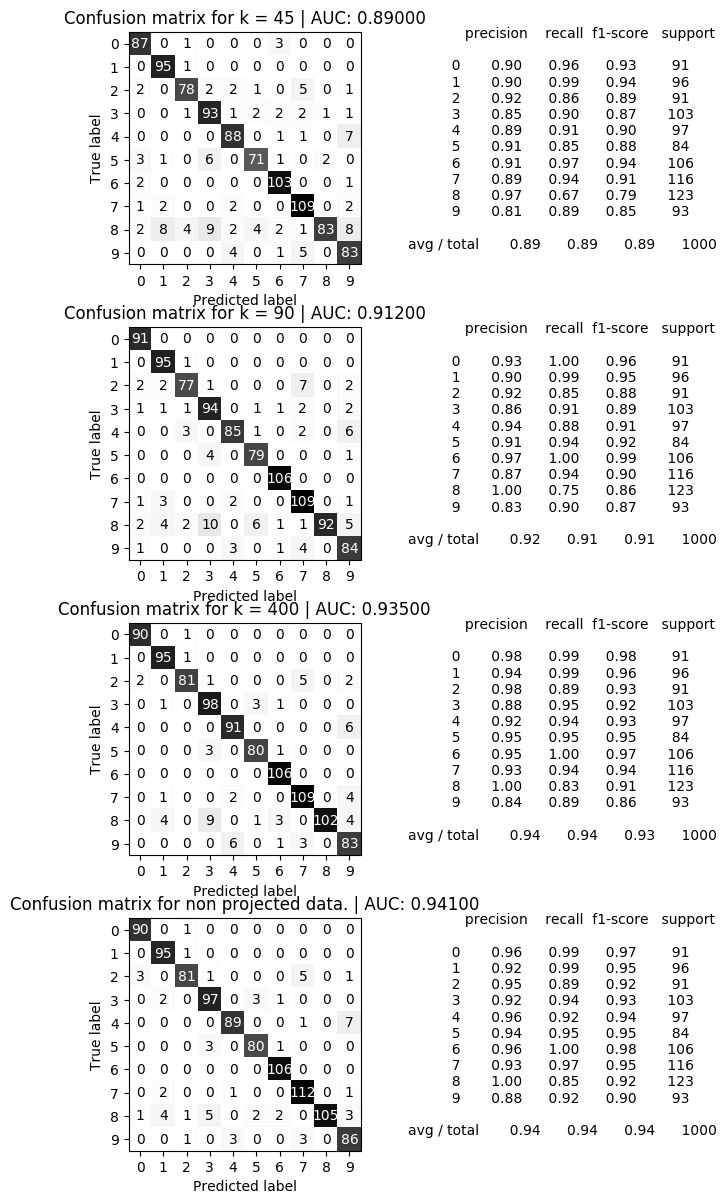

In [77]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_digits
digits = load_digits()

# create subplot to store confusion matrix
fig, axs = plt.subplots(4,1, figsize=(3,15))
axs = axs.ravel()

d=784;

for k, ax in zip([45, 90, 400,0], axs):   #45, 90, 400 and 0 represents unprojected data
    # Matrix R
    R=np.random.randint(0,2,size=(k,d)) # Randomly sample with probability 1/2
    R[R==0]=-1 #Matrix values in {-1,1} 
    R = R*(1/np.sqrt(d)) #Replacement with +/- 1/sqrt(d)
    
    #Projection of data one by one and storage
    proj=[];
    for i in range(len(X)): 
        v = R.dot(X[i]) #Projection
        proj.append(v) #Storage
    new_X = np.array(proj).reshape(len(X),k)

    # Splits the dataset in training and test set as specified ratio (laskdjalkdjkldasj)
    if k==0:
        # For the unprojected data
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=6/70, test_size=1/70,random_state=0)
    else:
        # Projected data
        X_train, X_test, y_train, y_test = train_test_split(new_X, y, train_size=6/70, test_size=1/70,random_state=0)

        
    #Fits the data to 1‐Nearest Neighbor (with and without random projection)
    knn_RP = neighbors.KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
    pred_RP = knn_RP.predict(X_test)
    
    
    #Output of 1-nn: Confusion matrix, AUC, precision, recall
    if k==0:
        #Confusion matrix for non projected data and AUC score
        ax.set_title("Confusion matrix for non projected data. | AUC: %.5f" % (accuracy_score(y_test, pred_RP)))      
    else :
        #Confusion matrix for projected data and AUC score
        ax.set_title("Confusion matrix for k = %d | AUC: %.5f" % (k,accuracy_score(y_test, pred_RP)))
    ax.invert_yaxis()
    # AUC score
    scores_image = mglearn.tools.heatmap(confusion_matrix(y_test, pred_RP), xlabel='Predicted label',
    ylabel='True label', xticklabels=digits.target_names,yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d", ax=ax) 
    # Precision, recall, extra info.
    ax.text(12,10,classification_report(y_test,pred_RP))
plt.show();

### Confusion matrix and AUC
We can already see some differences between the projected values of the confusion matrix in the projected and non projected data sets. The following points were observed:

- The errors decrease with the size of $k$. AUC score is smaller for smaller $k$.
- The highest $k=400$ is very similar to unprojected confusion matrix as well as the AUC score.
- The types of errors between projected and unprojected are similar. (Example: The number 8 is missclassified commonly as 3 and viceversa)

So in general, it seems that projecting into small dimension $k$ decreases the performance of the 1-Neighbor algorithm. When we are closer to the same dimension of our data the results tend to be similar.
### Precision, recall scores.

Let's make a short recapture of what precision and recall are:

Precision is the true positive rate and is given by:
$$Precision=\frac{TP}{TP+FP}$$

The higher the precision, the less false positives.

Recall is the sensitivity, and is given by:
$$Recall=\frac{TP}{TP+FN}$$

The higher the recall, the less false negatives.

From our results we see a similar behavior compared to the AUC scores. This means that for higher values of $k$ we get both, a highe precision and a high recall. This means that less false positives and less false negatives are obtained. 

## PCA of a handwritten digits (7 points, 3+2+2)
Analyze the first two principal components of the class with label $4$ of the MNIST data set (those are images that each depict a handwritten "4"). Perfom the steps (a), (b), (c) described below. Note that these steps are similar to the analysis given in the lecture. Include all images and plots in your report. You may use sklearn.decomposition.PCA for this assignment. Do not scale the data.

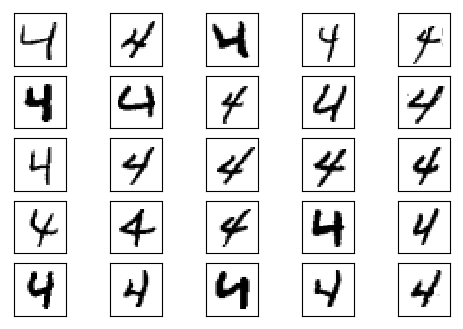

In [87]:
# build a list of figures on a 5x5 grid for plotting
def buildFigure5x5(fig, subfiglist):
    
    for i in range(0,25):
        pixels = np.array(subfiglist[i], dtype='float')
        pixels = pixels.reshape((28, 28))
        a=fig.add_subplot(5,5,i+1)
        imgplot =plt.imshow(pixels, cmap='gray_r')
        a.axes.get_xaxis().set_visible(False)
        a.axes.get_yaxis().set_visible(False)
    return
# find the first 25 instances with label '4' and plot them
imgs = np.empty([25, 28*28], dtype='float')
j=0
for i in range(0,len(X)):
    if(y[i] == 4) and j < 25:
        imgs[j] = np.array(X[i], dtype='float')
        j += 1

buildFigure5x5(plt.figure(1),imgs)
plt.show()


### Step (a)
 Generate a scatter plot of the data in the space spanned by the first two principal components of PCA. Reconstruct $25$ points on a $5 \times 5$ grid in this space that cover the variation of the data. Render each point as an image. Arrange the images in a $5 \times 5$ grid.


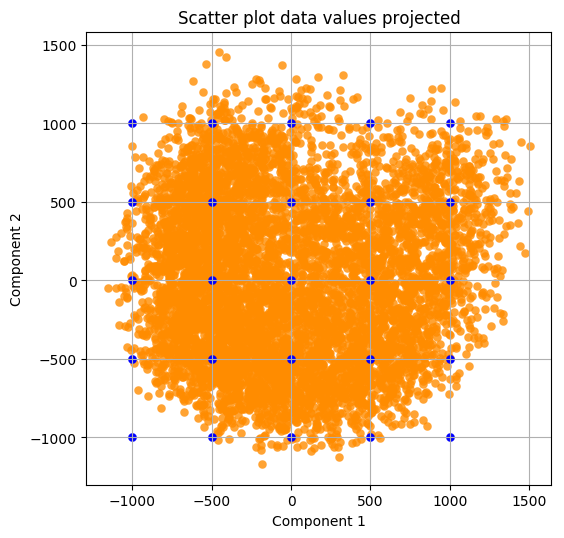

In [88]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) #PCA with 2 components.
X4 = pca.fit_transform(X[y==4]) #Transform data with digit=4 


# Plot scatter of components
plt.figure(figsize=(6,6))
plt.scatter(X4[:,0],X4[:,1], color='darkorange', alpha=0.8, lw=0.1)

# Add 5x5 grid of points equally spaced.
for i in range(-1000,1500,500):
    for j in range (-1000,1500,500):
        plt.scatter(i,j, lw=0.2,color='b')
plt.grid();
plt.xlabel("Component 1");
plt.ylabel("Component 2")
plt.title("Scatter plot data values projected");



In the plot we can see the values of the projection of each of the data points into the principal components. We discuss the proper formula later on.

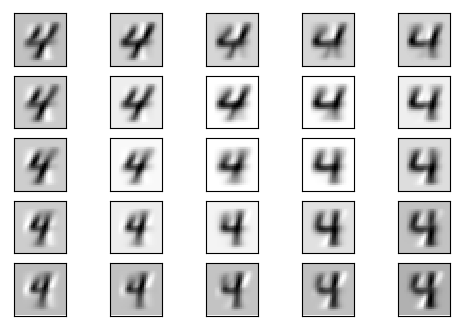

In [89]:
# Render images from components
comp = pca.components_ #Get components
imgs = np.empty([25, 28*28], dtype='float') #Fill images
k=0
for j in range(1000,-1500,-500):
    for i in range (-1000,1500,500):
        imgs[k] = i*comp[0]+j*comp[1]+pca.mean_ #Linear combination mean+lambda1*component1+lambda2*component2
        k += 1
#Plot        
buildFigure5x5(plt.figure(1),imgs)
plt.show()


Each image $p$ is obtained from the following formula:

$$p=\mu+\lambda_1v_1+\lambda_2v_2$$

Where $\mu$ is the mean of the values of the images, $\lambda_i$ is the projection value of the i-th component and $v_i$ is the principal i-th component where $i\in\{{1,2}\}$

We can see that going from left to right the images tend to get more straight in some sense. And from top to bottom they tend to be more skinny.

### Step (b) 
For each of the reconstructed points, find the original instance that is closest to it in the projection on the first two components (measured using Euclidean distance). Render the instances arranged in a $5 \times 5$ grid such that their position matches the rendering in (a).


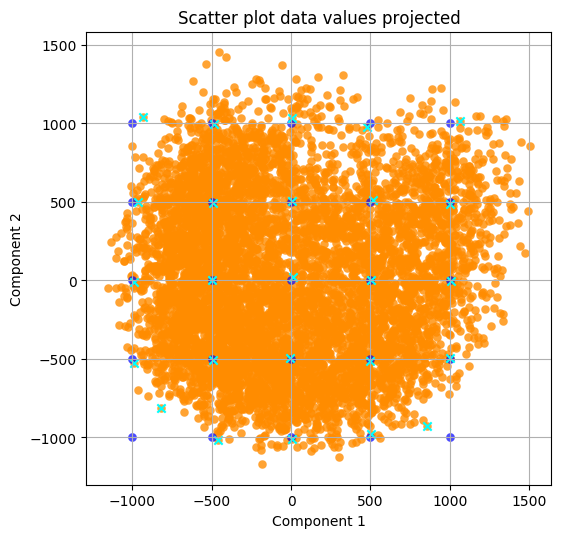

In [90]:
# Identify closest data points from the grid
from scipy.spatial import KDTree
plt.figure(figsize=(6,6))
plt.scatter(X4[:,0],X4[:,1], color='darkorange', alpha=0.8, lw=0.1);
treeIndex = []

for j in range(1000,-1500,-500):
    for i in range (-1000,1500,500):
        plt.scatter(i,j, alpha=0.7,lw=0.2,color ='b',label='Grid points')
        tree = KDTree(X4).query([i,j], k=1) #Identify closest data point
        plt.scatter(X4[tree[1]][0], X4[tree[1]][1], marker='x',color='aqua', lw=1.5,label='Closest data point')
        treeIndex.append(tree[1])
plt.grid();  
plt.xlabel("Component 1");
plt.ylabel("Component 2");
plt.title("Scatter plot data values projected");


In the plot the blue points represent the grid points and the cyan are the closest data points. We will now render the images.

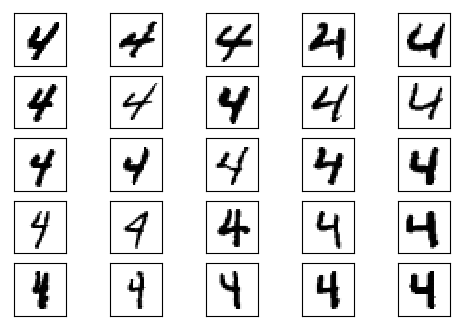

In [120]:
# Rendering images
nX = X[y==4] #Point with value = 4
buildFigure5x5(plt.figure(2),nX[treeIndex])
plt.show()

As we have seen previously in the linear combination, the images behave approximately the same. When checking from the left to right the images tend to be more straight. While going from top to bottom the images become narrower.

### Step (c)
Render the mean and the first two principal components as images. What is your interpretation of the first two components, i.e., which aspect of the data do they capture? Justify your interpretation, also using your results of Steps (a) and (b).


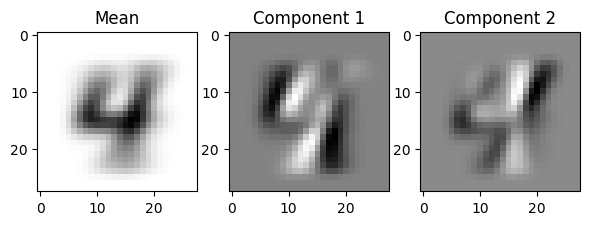

In [121]:
# create subplot with mean, and principal components
fig, axs = plt.subplots(1,3, figsize=(7,5))
axs = axs.ravel()
title = ['Mean', 'Component 1', 'Component 2']
i=0
for p, ax in zip([pca.mean_ , pca.components_[0], pca.components_[1]], axs):#Just plot mean and components
    ax.set_title(title[i])
    ax.imshow(p.reshape(28,28),cmap='gray_r')
    i += 1
plt.show();


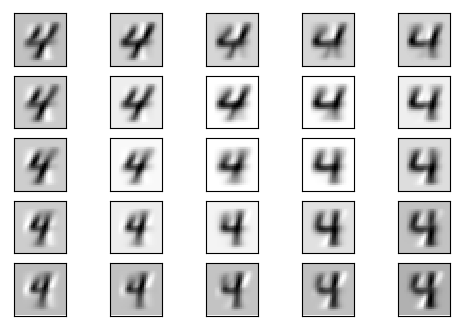

In [122]:
# Render images from components
comp = pca.components_ #Get components
imgs = np.empty([25, 28*28], dtype='float') #Fill images
k=0
for j in range(1000,-1500,-500):
    for i in range (-1000,1500,500):
        imgs[k] = i*comp[0]+j*comp[1]+pca.mean_ #Linear combination mean+lambda1*component1+lambda2*component2
        k += 1
#Plot        
buildFigure5x5(plt.figure(1),imgs)
plt.show()

As we have already previously discussed it seems that component 1 regulates the slanting of the numbers while component 2 is modigfying the narrowness of the numbers. 

The mean would just represent the average image from our set.


## Projection onto a hyperplane (4 points)
Let $F$ be a $k$-dimensional hyperplane given by the parametric representation
$$ g(\lambda) = \mu + {\bf V} \lambda,$$
where $\mu \in \mathbb{R}^d$ and the columns of $\bf V$ are pairwise orthogonal and normal vectors $\bf v_1,\dots,v_k \in \mathbb{R}^d$.
Let $f:\mathbb{R}^d\rightarrow F$ be the projection that maps every point ${\bf p} \in \mathbb{R}^d$ to its nearest point on $F$ (where distances are measured using the Euclidean distance). We can also write $f$ as follows 
$$f({\bf p}) = g\left({\bf V}^T ({\bf p}-\mu)\right).$$

Prove that for any ${\bf p,q} \in \mathbb{R}^d$, it holds that
$$ \|f({\bf p})-f({\bf q})\| \leq \|{\bf p-q}\|. $$

(Hint: Assume first that $\mu=0$. Rewrite $f$ using a rotation followed by an orthogonal projection. What happens to the distance in each step? Generalize to arbitrary $\mu$.)


## Proof

### Case 1 $\mu = 0$
Assuming $\mu = 0$ we have that $$f({\bf p})={\bf V}^T({\bf p})$$

#### Definition of rotation and projection.

We can rewrite $f({\bf p})$ as the product of a rotation and a projection. We shall denote the projection as ${\bf P}$ and the rotation as ${\bf R}$. We rewrite $f({\bf p})$ as $$f({\bf p})={\bf PRp}$$.


The rotation can be given in terms of an orthonormal basis of $\mathbb{R}^{d\times d}$ by extending $\bf v_1,v_2,\ldots,v_k$ to $\bf v_1,v_2,\ldots,v_d$ (we can always use the Gramm-Schmidt process to obtain this basis). The rotation matrix is then defined as a matrix $R\in \mathbb{R}^{d\times d}$ with the vectors $\bf v_1,v_2,\ldots,v_d$ as rows.

$$R=\left(  \begin{array}{c}
{\bf v_1}  \\
{\bf v_2}  \\
\vdots \\
{\bf v_d}   \end{array}     \right)$$

The projection is then given by the identity matrix of dimensions $k\times d$. 

$${\bf P}=\left(  \begin{array}{c}
{\bf e_1}  \\
{\bf e_2}  \\
\vdots \\
{\bf e_k}   \end{array}     \right) $$

Where $e_1,e_2,\ldots,e_k$ are the canonical vectors of $\mathbb{R}^k$. Where $e_i\in \mathbb{R}^k$ has entry 1 in the ith entry.


#### Difference of transformed data


The distance difference in the transformed points ${\bf p,q}\in \mathbb{R}^{d}$ is then: $$\|f({\bf p})-f({\bf q})\|=\|({\bf PRp})-({\bf PRq})\|=\|{\bf PR}({\bf p}-{\bf q})\|$$

If we define the vector ${\bf x}$ as ${\bf x}={\bf R}({\bf p}-{\bf q})$, the difference is now given by : $$\|f({\bf p})-f({\bf q})\|=\|{\bf Px}\|$$

The multiplication ${\bf Px}$ is then given by:

$${\bf Px}=\left(  \begin{array}{c}
<{\bf e_1}|{\bf x}>  \\
<{\bf e_2}|{\bf x}>  \\
\vdots \\
<{\bf e_k}|{\bf x}>   \end{array}     \right) $$

Where $<{\bf e_i}|{\bf x}>$ is the inner product between the vector $\bf x$ and $\bf e_i$ (it is the ith component of x). 


Taking the norm of this vector we get:
$$\|{\bf Px}\|=\sqrt(\sum_{i=1}^{k}<{\bf e_i}|{\bf x}>^2)\leq \sqrt(\sum_{i=1}^{d}<{\bf e_i}|{\bf x}>^2)=\|{\bf x}\|$$

The inequality is true since we are taking the sum of positive values.

$$\|{\bf Px}\|=\|f({\bf p})-f({\bf q})\|\leq \|{\bf x}\|=\|{\bf R}({\bf p-q})\| =\|{\bf p-q}\|$$.

The last equality follows from the fact that **rotations maintain the norm invariant**.
For $\mu=0$ we have obtained the desired result.

### Case 2 $\mu \neq 0$
Assuming $\mu \neq 0$ we have that

$$f({\bf p})={\bf V}^T({\bf (p-\mu)})$$



The distance difference in the transformed points ${\bf p,q}\in \mathbb{R}^{d}$ is then:

$$\|f({\bf p})-f({\bf q})\|=\|{\bf PR(p-\mu)}-{\bf PR(q-\mu)}\|=\|{\bf PR}({\bf p-\mu}-{\bf q+\mu})\|=\|{\bf PR}({\bf p}-{\bf q})\|$$ 

which reduces to the case where $\mu = 0$ which we have already proven.


We then conclude that for any $\bf p,q\in\mathbb{R}^d$ 

$$\|f({\bf p})-f({\bf q})\|\leq  \|{\bf p-q}\|$$.

## Locality-sensitive hashing (3 points, 1+2)

$H$ is a family of $(d_1,d_2,p_1,p_2)$-locality-sensitive hash functions if it holds that
\begin{align}
\text{if}\quad d({\bf p,q})\leq d_1 \quad &\text{then}& \quad \Pr\left[ h({\bf p})=h({\bf q})\right] \geq p_1 \quad \\
\text{if}\quad d({\bf p,q})\geq d_2 \quad &\text{then}& \quad \Pr\left[ h({\bf p})=h({\bf q})\right] \leq p_2 \quad
\end{align}

### Case: $p_2=0$
Assume that $p_2=0$ and assume we have a total numer of $m$ hash
functions from this family available.  Which combination of AND-constructions
and OR-constructions should we use to amplify the hash family?


Since we have $p_2=0$ then $H$ is a family of $(d_1,d_2,p_1,0)$ hash functions. 

We already have that for points far away the probability of having the same value is zero. We would like now to amplify the probability of choosing correctly the hash value for points that are close together.
### AND 

To objective of using AND functions is to diminish the probability $p_2$. Since in our case this probability is already $0$, by using an AND we would actually just decrease our probability of classifying correctly close points. We will now look at the OR operations.

### OR

If we want to amplify the probability of hashing correctly two points that are close, we can use the OR operation to define a new family of functions $H'$. Each of the functions in this new family is in terms of the $m$ hash functions available from $H$.

This means that we define the family $H'$ whose hash functions are such that $h'(p)=h'(q) \iff h_i(p)=h_i(q)$ for any $i \in \{1,2,\ldots,m\}$.

The family $H'$ is then a family of $(d_1,d_2,1-(1-p_1)^m,0)$ locally sensitive hash functions.

For any $1\geq p_1>0$ we have that $1-(1-p_1)^m\geq p_1$ for any $m\in \mathbb{N}$

We can see this effect in the following plots of $1-(1-p_1)^m\geq p_1$ with respect to $m$. 

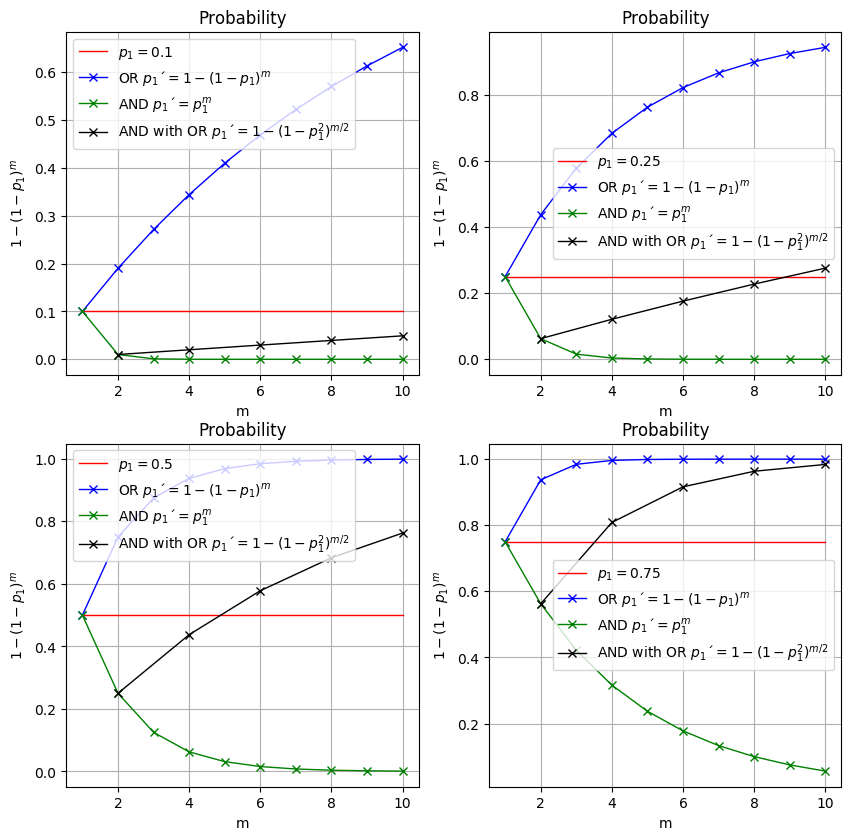

In [170]:
#Example plots
x=np.array(range(10));
x2 = np.array([2,4,6,8,10])
p_1=0.1;
fig, axs = plt.subplots(2,2, figsize=(10,10))
axs = axs.ravel()
for p_1, ax in zip([0.1, 0.25, 0.5,0.75], axs):
    _=ax.plot(x+1,p_1*np.ones(len(x)),'-r',linewidth=1,label='$p_1=$'+str(p_1))
    _=ax.plot(x+1,1-(1-p_1)**(x+1),'-xb',linewidth=1,label='OR $p_1´=1-(1-p_1)^m$')
    _=ax.plot(x+1,p_1**(x+1),'-xg',linewidth=1,label='AND $p_1´=p_1^m$')
    _=ax.plot(x2,1-(1-p_1**2)**(x2/2),'-xk',linewidth=1,label='AND with OR $p_1´=1-(1-p_1^2)^{m/2}$')
    _=ax.grid()
    _=ax.legend(loc='best')
    _=ax.set_title('Probability')
    _=ax.set_xlabel("m")
    _=ax.set_ylabel(r'$1-(1-p_1)^m$')

As we can see, the AND operation decreases dramatically the probability $p_1'$ to $0$ from the hash family $H'$.

For the combination of AND with OR we have used $m/2$ bands with $2$ elements per signature. In this case $p_1'=1-(1-p_1^2)^{m/2}$. Once again we see that the probability is not better than the one for the OR opearation. Nevertheless, the probability is increasing in this case.

The steepest increase with respect to $m$ is with the OR operation. We conclude that for amplifying the probability $p_1$ we should use and OR operation with $m$ bands.

### Case: $p_2=\frac{1}{n}$
Now assume that $p_2=\frac{1}{n}$ and assume we have $n$ data points $\bf P$
which are stored in a hash table using a randomly chosen function $h$ from $H$.
Given a query point $\bf q$, we retrieve the points in the hash bucket with index $h(\bf q)$ to search 
for a point which has small distance to $\bf q$. 
Let $X$ be a random variable that is equal to the size of the set 

\begin{align}
\left\{{\bf p \in P}\,:\, h({\bf p})=h({\bf q}) \,\wedge\, d({\bf p,q}) \geq d_2\right\}\
\end{align}

which consists of the false positives of this query.

Derive an upper bound on the expected number of false-positives $\mathbb{E}\left[ X \right]$ using $p_2$. Explain each step of your derivation.


### Upper bound

First we should define the set of points that are far from $\bf q$. The set can be described as follows:

$${\bf Q} =\{{\bf p}\in {\bf P} :d({\bf p,q})\geq d_2\}$$

The expected value of $X$ is then given by:

$$\mathbb{E}\left[ X \right]=\sum_{i=1}^{|Q|}i \Pr\left[ X=i\right]=\sum_{i=1}^{|Q|}i \Pr\left[ h({\bf p})=h({\bf q})\right]^i$$

Where $|Q|$ is the cardinality of the set $Q$ and  we have used the fact that for each point ${\bf p}\in {\bf P}$ the probability $\Pr\left[ h({\bf p})=h({\bf q})\right]$ is independent and then $\Pr\left[ X=i\right]=\Pr\left[ h({\bf p})=h({\bf q})\right]^i$. 

Since $X$ is always positive together with the probability, we can bound from above the expected value with the complete sum over all the points $p\in P-\{q\}$. We don't take into account $q$ since it doesn't contribute to this sum (we are sure that q is not far from itself).

$$\mathbb{E}\left[ X \right]=\sum_{i=1}^{|Q|}i \Pr\left[ h({\bf p})=h({\bf q})\right]^i\leq \sum_{i=1}^{n-1}i \Pr\left[ h({\bf p})=h({\bf q})\right]^i\leq \sum_{i=1}^{n-1}i \left(\frac{1}{n}\right)^i $$

The last inequality comes from $\Pr\left[ h({\bf p})=h({\bf q})\right]\leq p_2=\left(\frac{1}{n}\right)$.

Then $\mathbb{E}\left[ X \right]$ is bounded by:

$$\mathbb{E}\left[ X \right]\leq \sum_{i=1}^{n-1}i \left(\frac{1}{n}\right)^i $$

We can plo

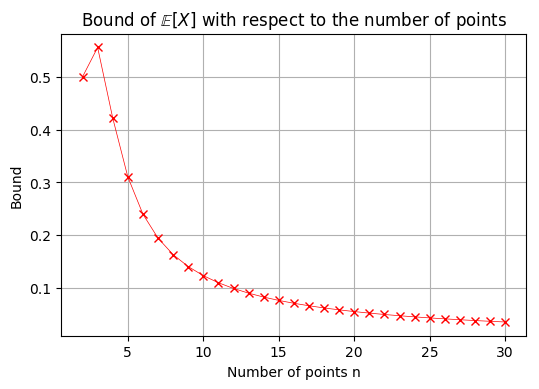

In [192]:
bounds=[];
end = 30;
for i in np.arange(2,end+1):
    bound = 0;
    for j in np.arange(1,i):
        bound = bound+j*(1/i)**j    
    bounds.append(bound)
    
_=plt.plot(np.arange(2,end+1),bounds,'-xr')
_=plt.xlabel('Number of points n')
_=plt.ylabel('Bound')
_=plt.title('Bound of $\mathbb{E}[X]$ with respect to the number of points')
_=plt.grid()

As we can see the bound first increases for $n=3$ then it decreases again making the expected number of misclassified data points tend to zero with the number of data points. This means that when we increase the size of the data set, we tend to have zero misclassifications from far points on average.